실무에서 score을 많이 사용
Decision Tree, Logistic, Neural Network, Ensemble 모두 사용하나
대부분이 Logistic Regression을 사용함.

Score Card란?

모형의 Good / Bad를 예측하는 형태
나이/근속년수 등에 따라 점수를 할당함

In [11]:
load(file.choose())

In [14]:
str(german)

'data.frame':	1000 obs. of  21 variables:
 $ checking: Factor w/ 4 levels "1","2","3","4": 1 2 4 1 1 4 4 2 4 2 ...
 $ duration: num  6 48 12 42 24 36 24 36 12 30 ...
 $ history : Factor w/ 5 levels "0","1","2","3",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose : Factor w/ 10 levels "0","1","2","3",..: 4 4 7 3 1 7 3 2 4 1 ...
 $ amount  : num  1169 5951 2096 7882 4870 ...
 $ savings : Factor w/ 5 levels "1","2","3","4",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employed: Factor w/ 5 levels "1","2","3","4",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installp: num  4 2 2 2 3 2 3 2 2 4 ...
 $ marital : Factor w/ 4 levels "1","2","3","4": 3 2 3 3 3 3 3 3 1 4 ...
 $ coapp   : Factor w/ 3 levels "1","2","3": 1 1 1 3 1 1 1 1 1 1 ...
 $ resident: num  4 2 3 4 4 4 4 2 4 2 ...
 $ property: Factor w/ 4 levels "1","2","3","4": 1 1 1 2 4 4 2 3 1 3 ...
 $ age     : num  67 22 49 45 53 35 53 35 61 28 ...
 $ other   : Factor w/ 3 levels "1","2","3": 3 3 3 3 3 3 3 3 3 3 ...
 $ housing : Factor w/ 3 levels "1","2","3": 2 2 2 3 3 3 2 1 2

In [15]:
logit.german <- glm(good.bad ~ ., data = german, family = binomial)
#generalized linear model

In [16]:
summary(logit.german)


Call:
glm(formula = good.bad ~ ., family = binomial, data = german)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6116  -0.7095   0.3752   0.6994   2.3410  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.005e-01  1.084e+00  -0.369 0.711869    
checking2    3.749e-01  2.179e-01   1.720 0.085400 .  
checking3    9.657e-01  3.692e-01   2.616 0.008905 ** 
checking4    1.712e+00  2.322e-01   7.373 1.66e-13 ***
duration    -2.786e-02  9.296e-03  -2.997 0.002724 ** 
history1    -1.434e-01  5.489e-01  -0.261 0.793921    
history2     5.861e-01  4.305e-01   1.362 0.173348    
history3     8.532e-01  4.717e-01   1.809 0.070470 .  
history4     1.436e+00  4.399e-01   3.264 0.001099 ** 
purpose1     1.666e+00  3.743e-01   4.452 8.51e-06 ***
purpose2     7.916e-01  2.610e-01   3.033 0.002421 ** 
purpose3     8.916e-01  2.471e-01   3.609 0.000308 ***
purpose4     5.228e-01  7.623e-01   0.686 0.492831    
purpose5     2.164e-01  5.500e-0

In [17]:
step(logit.german) # stepwise variable selection

Start:  AIC=993.82
good.bad ~ checking + duration + history + purpose + amount + 
    savings + employed + installp + marital + coapp + resident + 
    property + age + other + housing + existcr + job + depends + 
    telephon + foreign

           Df Deviance     AIC
- job       3   896.56  988.56
- property  3   899.08  991.08
- resident  1   895.82  991.82
- depends   1   896.94  992.94
<none>          895.82  993.82
- existcr   1   897.89  993.89
- employed  4   904.03  994.03
- housing   2   900.05  994.05
- telephon  1   898.06  994.06
- age       1   898.34  994.34
- marital   3   905.15  997.15
- coapp     2   903.24  997.24
- foreign   1   901.88  997.88
- other     2   903.98  997.98
- amount    1   904.28 1000.28
- duration  1   904.87 1000.87
- savings   4   915.63 1005.63
- installp  1   910.27 1006.27
- history   4   917.62 1007.62
- purpose   9   931.12 1011.12
- checking  3   962.05 1054.05

Step:  AIC=988.56
good.bad ~ checking + duration + history + purpose + amount +


Call:  glm(formula = good.bad ~ checking + duration + history + purpose + 
    amount + savings + installp + marital + coapp + age + other + 
    housing + telephon + foreign, family = binomial, data = german)

Coefficients:
(Intercept)    checking2    checking3    checking4     duration     history1  
 -1.7495411    0.3900152    1.0240813    1.7177165   -0.0256787    0.1187724  
   history2     history3     history4     purpose1     purpose2     purpose3  
  0.8303101    0.9097304    1.4917085    1.6072585    0.7404978    0.9194787  
   purpose4     purpose5     purpose6     purpose8     purpose9     purposeX  
  0.5250945    0.1424475   -0.1435655    2.1643060    0.7826591    1.4349203  
     amount     savings2     savings3     savings4     savings5     installp  
 -0.0001294    0.3282182    0.4303584    1.2894345    0.9628458   -0.3299308  
   marital2     marital3     marital4       coapp2       coapp3          age  
  0.2872096    0.8227885    0.4169133   -0.4874391    1.0404263

In [19]:
# training vs validation 데이터 분할
tr.index = sample(1:1000, round(1000 * 0.7))
german.tr = german[tr.index,]
german.val = german[-tr.index,]

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

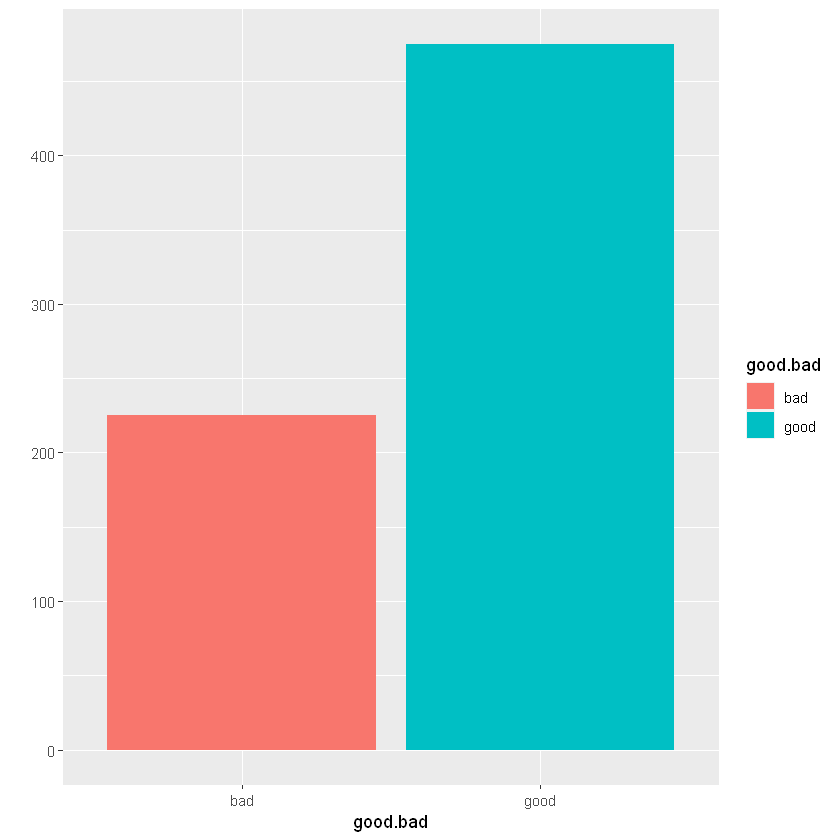

In [20]:
library(ggplot2)
qplot(good.bad, data = german.tr, geom = "bar", fill = good.bad)
#good / bad에 비해 plot 그리기

 Factor w/ 4 levels "1","2","3","4": 1 2 4 1 1 4 4 2 4 2 ...


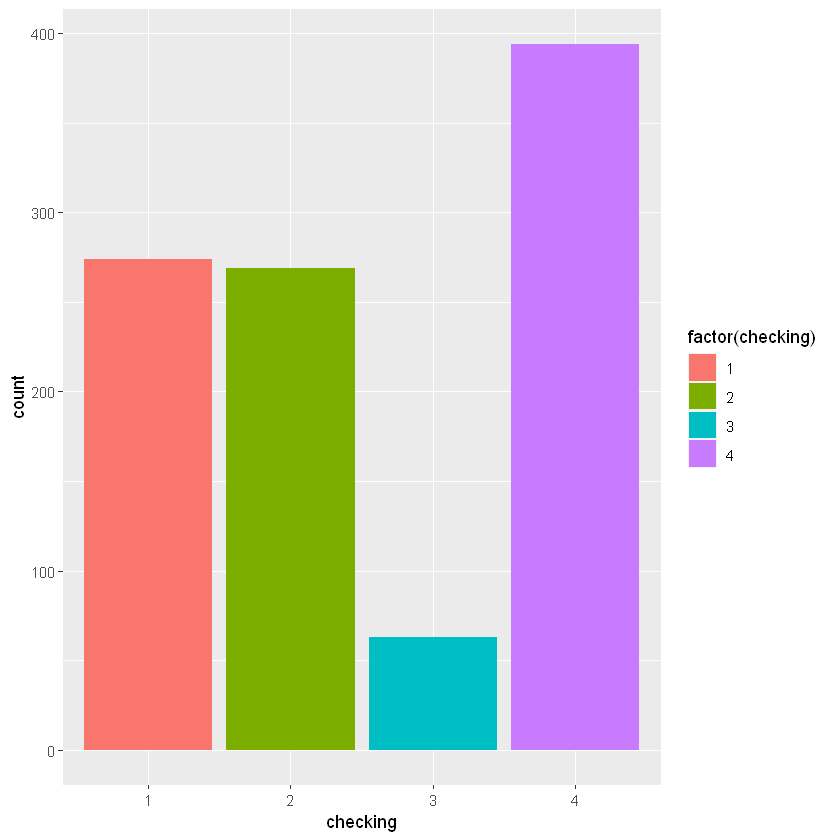

In [22]:
str(german$checking)
ggplot(german, aes(checking, fill = factor(checking))) + geom_bar()

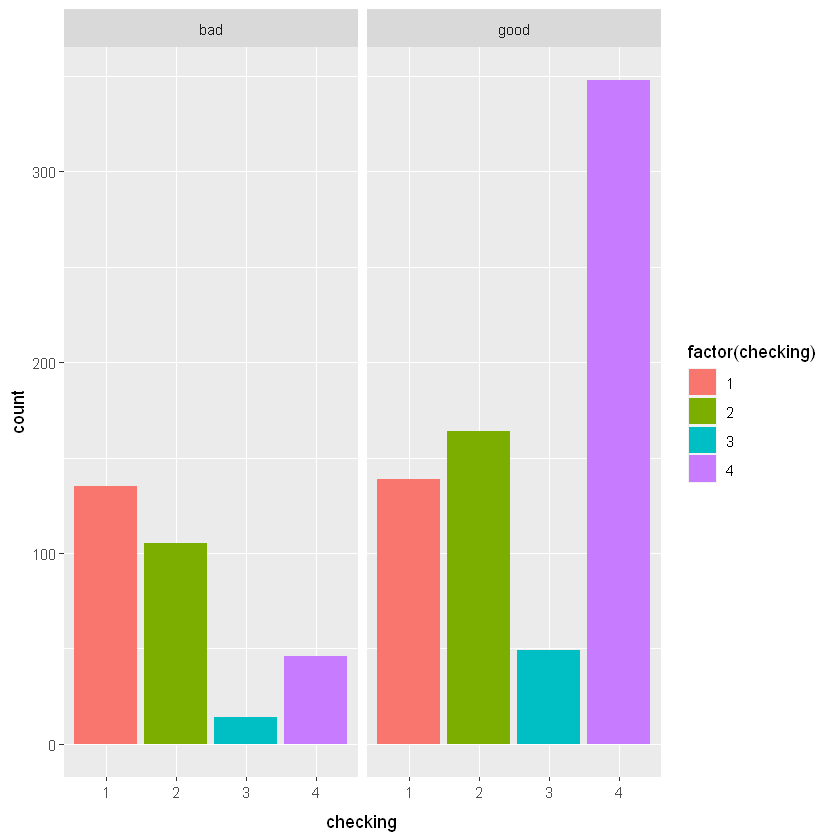

In [23]:
ggplot(german, aes(checking, fill = factor(checking))) + geom_bar() + facet_grid(.~good.bad)
#위와 같으나 bad / good으로 나누어 비교

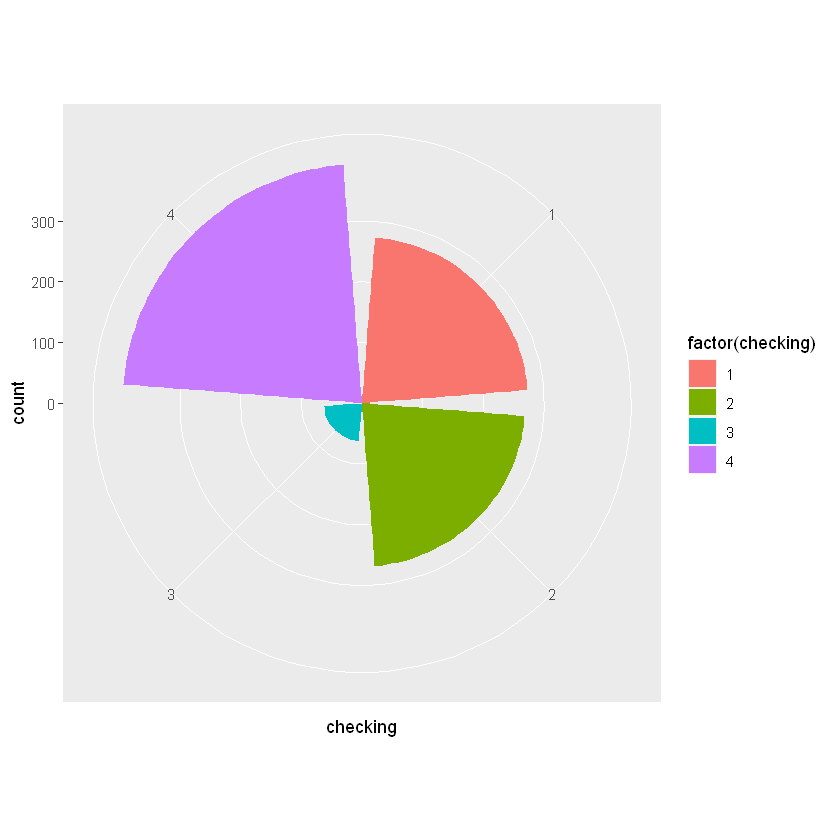

In [24]:
ggplot(german, aes(checking, fill = factor(checking))) + geom_bar() + 
coord_polar()

In [26]:
library(dplyr)
grcheck <- gr.checking %>% group_by(Var1) %>% mutate(freq_sum=sum(Freq)) %>% mutate(freqpercent=Freq/freq_sum) 
grcheck
# good / bad / checking에 따라 범주화 후 count

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Var1,Var2,Freq,freq_sum,freqpercent
bad,1,135,300,0.45000000
good,1,139,700,0.19857143
bad,2,105,300,0.35000000
good,2,164,700,0.23428571
bad,3,14,300,0.04666667
good,3,49,700,0.07000000
bad,4,46,300,0.15333333
good,4,348,700,0.49714286


In [27]:
grcheck.drop <- gr.checking %>% group_by(Var1) %>% mutate(freq_sum=sum(Freq)) %>% transmute(freqpercent=Freq/freq_sum) 

Var1,freqpercent
bad,0.45000000
good,0.19857143
bad,0.35000000
good,0.23428571
bad,0.04666667
good,0.07000000
bad,0.15333333
good,0.49714286


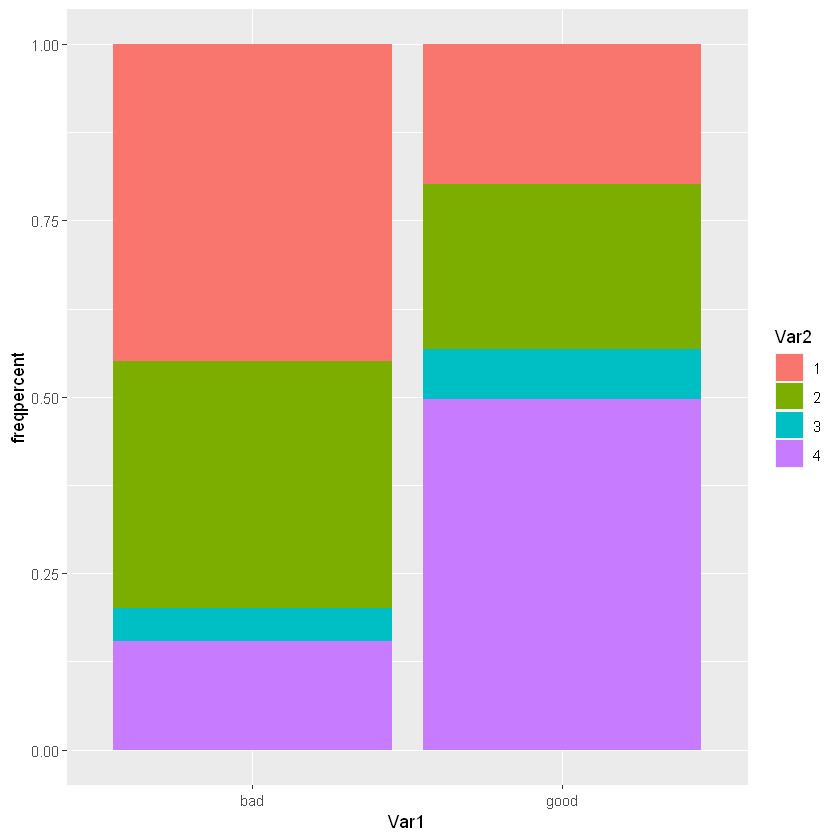

In [28]:
grcheck.drop
ggplot(grcheck, aes(Var1, freqpercent))+geom_bar(aes(fill=Var2), stat="identity")

In [31]:
library(plyr)
gr.checking.mutate <- ddply(gr.checking, .(Var1), mutate, freq.sum=sum(Freq))

grcheck <- ddply(gr.checking.mutate, .(Var1, Var2), summarise, freq.percent=Freq/freq.sum)

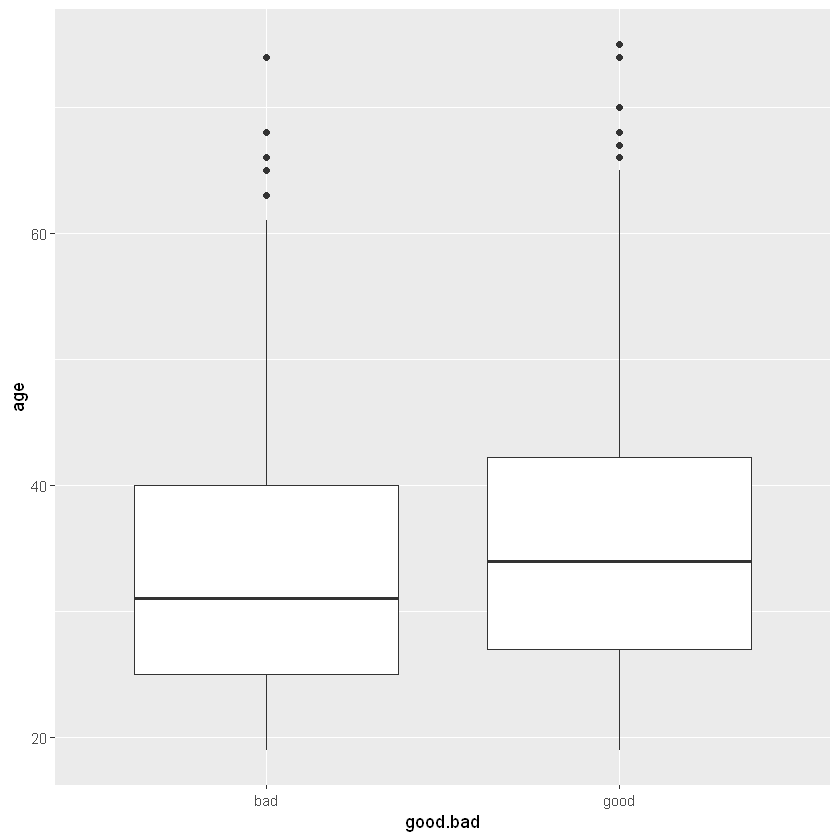

In [34]:
#box plot을 활용한 분포 비교
p <- ggplot(german, aes(good.bad, age)) 
p + geom_boxplot()

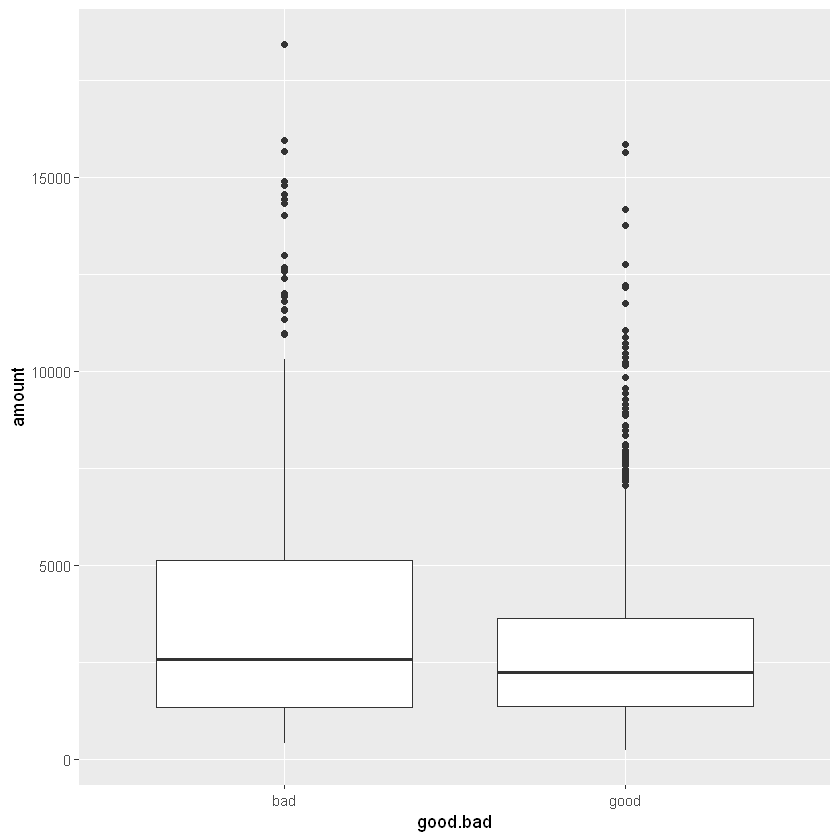

In [35]:
p <- ggplot(german, aes(good.bad, amount)) 
p + geom_boxplot()

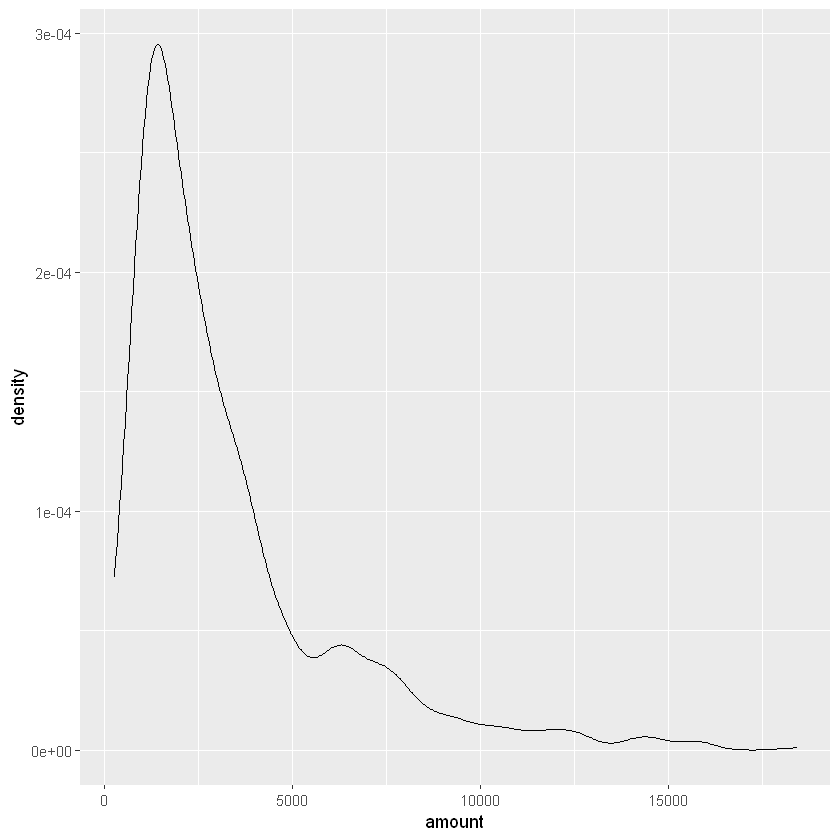

In [36]:
pp <- ggplot(german, aes(amount))
pp + geom_density()

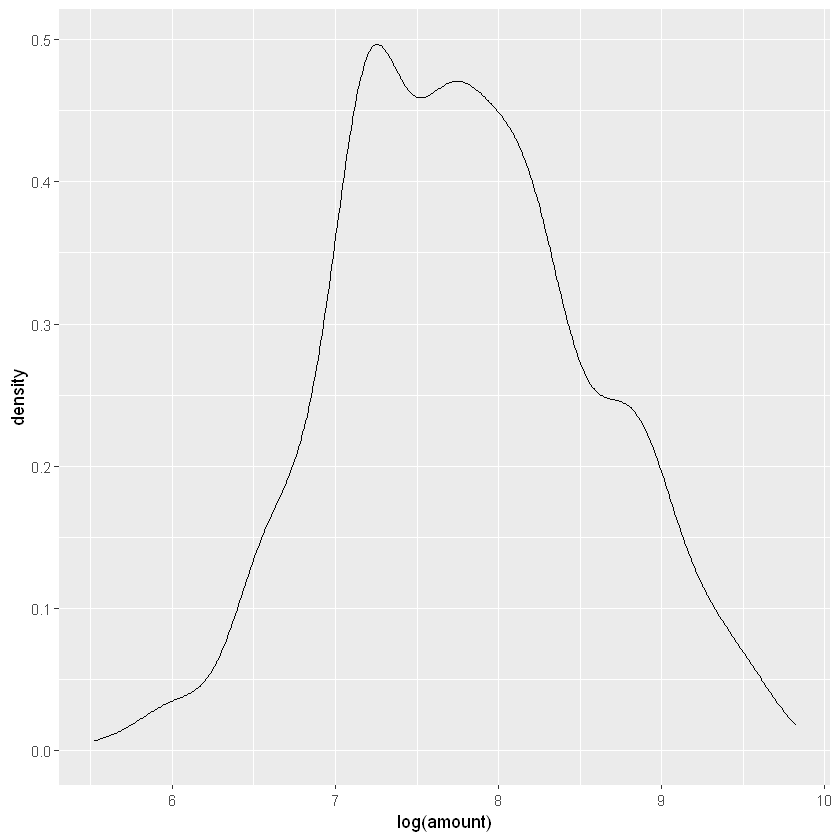

In [37]:
logpp <- ggplot(german, aes(log(amount)))
logpp + geom_density()
#로그변환을 통해 변환

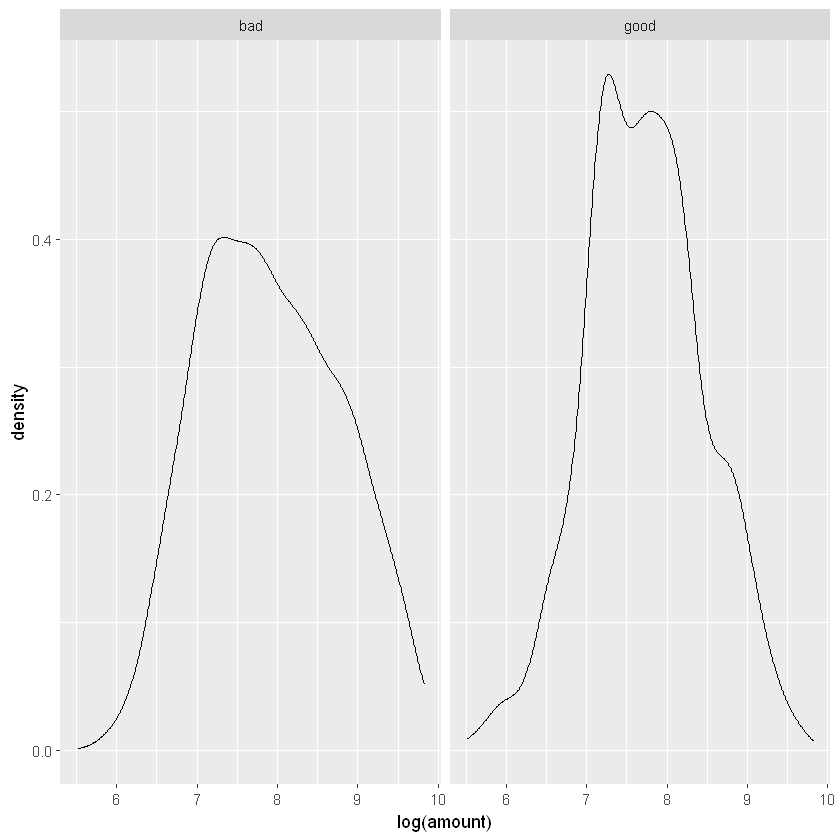

In [38]:
logpp + geom_density() + facet_grid(. ~ good.bad)

In [39]:
#dummary variable 생성
german.savings <- german$savings
savings.d1 <- (german.savings=="1" | german.savings=="2")*1
savings.d2 <- (german.savings=="3")*1
savings.d3 <- (german.savings=="4")*1

In [40]:
savings.dummy <- cbind(savings.d1, savings.d2, savings.d3)
head(savings.dummy)

savings.d1,savings.d2,savings.d3
0,0,0
1,0,0
1,0,0
1,0,0
1,0,0
0,0,0


In [41]:
german.checking <- german$checking
checking.d1 <- (german.checking=="1")*1
checking.d2 <- (german.checking=="2")*1
checking.d3 <- (german.checking=="3")*1

In [42]:
checking.dummy <- cbind(checking.d1, checking.d2, checking.d3)
head(checking.dummy)

checking.d1,checking.d2,checking.d3
1,0,0
0,1,0
0,0,0
1,0,0
1,0,0
0,0,0


In [44]:
german.cp <- cbind(german,savings.dummy, checking.dummy) #data frame에 vector을 결합하여 만듬

In [46]:
#score 구하기
logit.german.cp <- glm(good.bad ~ savings.d1+savings.d2+savings.d3+checking.d1+checking.d2+checking.d3, data=german.cp[tr.index, ], family=binomial())
logit.german.cp


Call:  glm(formula = good.bad ~ savings.d1 + savings.d2 + savings.d3 + 
    checking.d1 + checking.d2 + checking.d3, family = binomial(), 
    data = german.cp[tr.index, ])

Coefficients:
(Intercept)   savings.d1   savings.d2   savings.d3  checking.d1  checking.d2  
     2.2694      -0.6639       0.1557       0.7121      -1.8195      -1.5109  
checking.d3  
    -0.6108  

Degrees of Freedom: 699 Total (i.e. Null);  693 Residual
Null Deviance:	    879.1 
Residual Deviance: 768.1 	AIC: 782.1

In [48]:
scr.val = predict(logit.german.cp, newdata = german.cp[-tr.index,])
scr.val[1:10]

4           5           7          15          17          23 
-0.21396095 -0.21396095  2.42508144 -0.21396095  2.26942936 -0.21396095 
         24          28          31          33 
 0.09467814  2.37069357  1.47062337  0.09467814

In [50]:
score.val <- data.frame(log.odds=scr.val, good.bad=german.cp[-tr.index, "good.bad"])
# (1 - p) / p 를 통한 변환
head(score.val)

,log.odds,good.bad
4,-0.213961,good
5,-0.213961,bad
7,2.425081,good
15,-0.213961,good
17,2.269429,good
23,-0.213961,good


In [51]:
write.csv(score.val, "scoreval.csv")